# **Decision Trees**
#**The Data**

We will work with the "Palmer Penguins" dataset, as it is simple enough to help us fully understand how changing hyperparameters can change classification results.

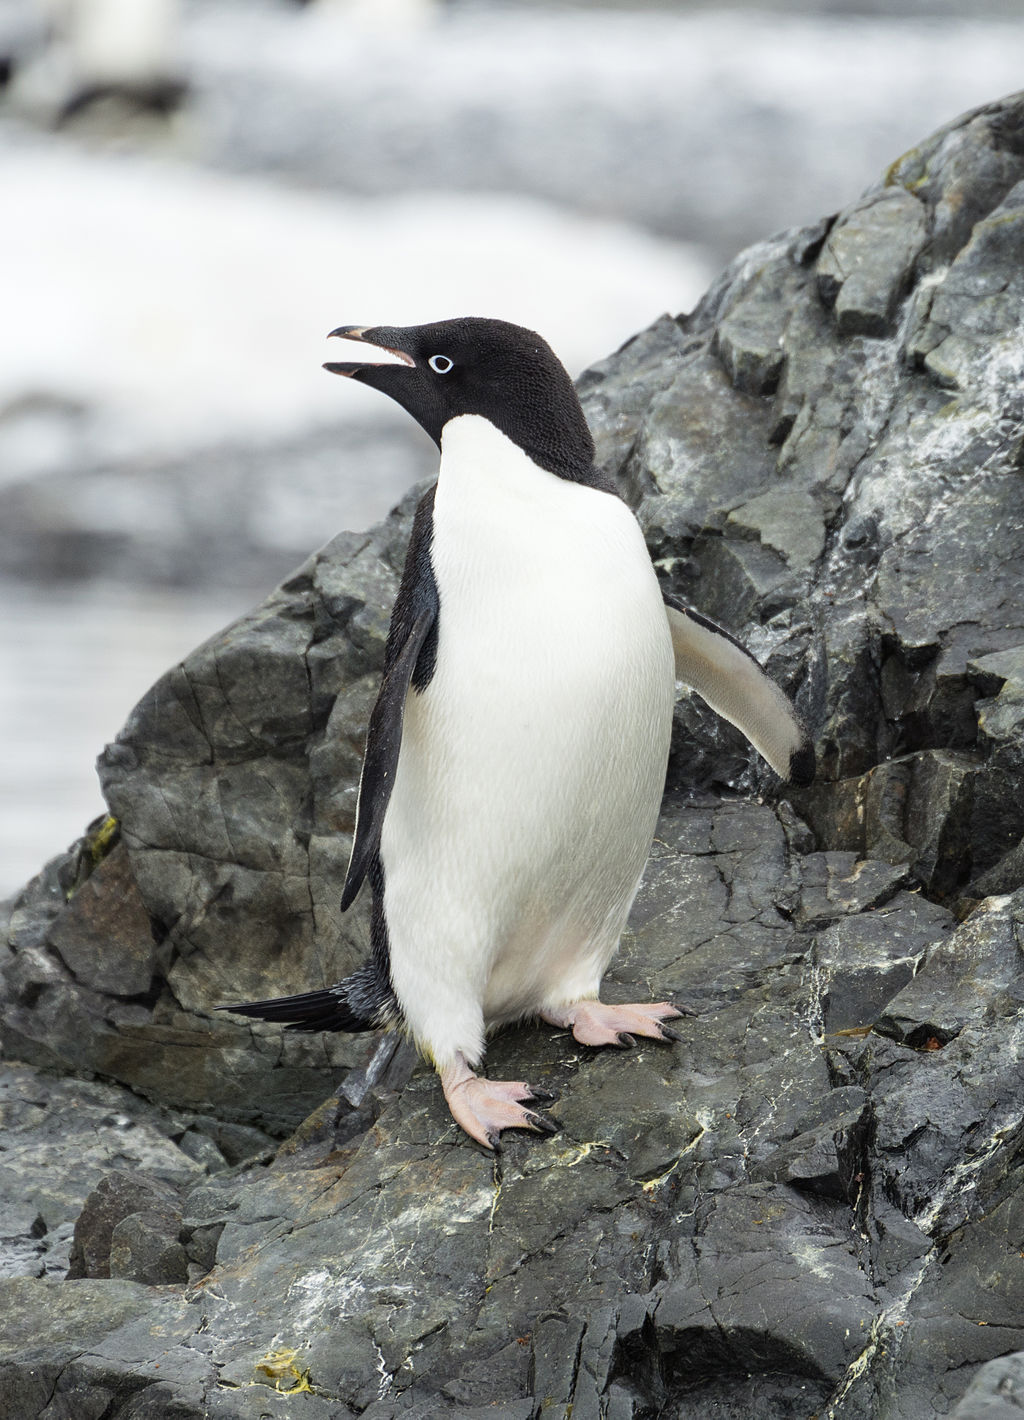

**Our goal is to create a model that can help predict a species of a penguin based on physical attributes, then we can use that model to help researchers classify penguins in the field, instead of needing an experienced biologist**

In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [198]:
df = pd.read_csv('/content/penguins_lter.csv')
df

studyName  Sample Number                              Species  Region  \
0     PAL0708              1  Adelie Penguin (Pygoscelis adeliae)  Anvers   
1     PAL0708              2  Adelie Penguin (Pygoscelis adeliae)  Anvers   
2     PAL0708              3  Adelie Penguin (Pygoscelis adeliae)  Anvers   
3     PAL0708              4  Adelie Penguin (Pygoscelis adeliae)  Anvers   
4     PAL0708              5  Adelie Penguin (Pygoscelis adeliae)  Anvers   
..        ...            ...                                  ...     ...   
339   PAL0910            120    Gentoo penguin (Pygoscelis papua)  Anvers   
340   PAL0910            121    Gentoo penguin (Pygoscelis papua)  Anvers   
341   PAL0910            122    Gentoo penguin (Pygoscelis papua)  Anvers   
342   PAL0910            123    Gentoo penguin (Pygoscelis papua)  Anvers   
343   PAL0910            124    Gentoo penguin (Pygoscelis papua)  Anvers   

        Island               Stage Individual ID Clutch Completion  Date Egg  \
0    Torgersen  Adult, 1 Egg Stage          N1A1               Yes  11/11/07   
1    Torgersen  Adult, 1 Egg Stage          N1A2               Yes  11/11/07   
2    Torgersen  Adult, 1 Egg Stage          N2A1               Yes  11/16/07   
3    Torgersen  Adult, 1 Egg Stage          N2A2               Yes  11/16/07   
4    Torgersen  Adult, 1 Egg Stage          N3A1               Yes  11/16/07   
..         ...                 ...           ...               ...       ...   
339     Biscoe  Adult, 1 Egg Stage         N38A2                No   12/1/09   
340     Biscoe  Adult, 1 Egg Stage         N39A1               Yes  11/22/09   
341     Biscoe  Adult, 1 Egg Stage         N39A2               Yes  11/22/09   
342     Biscoe  Adult, 1 Egg Stage         N43A1               Yes  11/22/09   
343     Biscoe  Adult, 1 Egg Stage         N43A2               Yes  11/22/09   

     Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
0                  39.1               18.7                181.0   
1                  39.5               17.4                186.0   
2                  40.3               18.0                195.0   
3                   NaN                NaN                  NaN   
4                  36.7               19.3                193.0   
..                  ...                ...                  ...   
339                 NaN                NaN                  NaN   
340                46.8               14.3                215.0   
341                50.4               15.7                222.0   
342                45.2               14.8                212.0   
343                49.9               16.1                213.0   

     Body Mass (g)     Sex  Delta 15 N (o/oo)  Delta 13 C (o/oo)  \
0           3750.0    MALE                NaN                NaN   
1           3800.0  FEMALE            8.94956          -24.69454   
2           3250.0  FEMALE            8.36821          -25.33302   
3              NaN     NaN                NaN                NaN   
4           3450.0  FEMALE            8.76651          -25.32426   
..             ...     ...                ...                ...   
339            NaN     NaN                NaN                NaN   
340         4850.0  FEMALE            8.41151          -26.13832   
341         5750.0    MALE            8.30166          -26.04117   
342         5200.0  FEMALE            8.24246          -26.11969   
343         5400.0    MALE            8.36390          -26.15531   

                           Comments  
0    Not enough blood for isotopes.  
1                               NaN  
2                               NaN  
3                Adult not sampled.  
4                               NaN  
..                              ...  
339                             NaN  
340                             NaN  
341                             NaN  
342                             NaN  
343                             NaN  

[344 rows x 17 columns]

In [204]:
df = df.drop(['studyName','Sample Number','Region','Stage','Individual ID','Clutch Completion','Date Egg','Delta 15 N (o/oo)','Delta 13 C (o/oo)','Comments'],axis = 1)

# **EDA**

In [205]:
df.isnull().sum()

Species                 0
Island                  0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Sex                    10
dtype: int64

In [206]:
df.duplicated().sum()

np.int64(0)

In [207]:
df.describe().T

count         mean         std     min       25%  \
Culmen Length (mm)   342.0    43.921930    5.459584    32.1    39.225   
Culmen Depth (mm)    342.0    17.151170    1.974793    13.1    15.600   
Flipper Length (mm)  342.0   200.915205   14.061714   172.0   190.000   
Body Mass (g)        342.0  4201.754386  801.954536  2700.0  3550.000   

                         50%     75%     max  
Culmen Length (mm)     44.45    48.5    59.6  
Culmen Depth (mm)      17.30    18.7    21.5  
Flipper Length (mm)   197.00   213.0   231.0  
Body Mass (g)        4050.00  4750.0  6300.0

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Island               344 non-null    object 
 2   Culmen Length (mm)   342 non-null    float64
 3   Culmen Depth (mm)    342 non-null    float64
 4   Flipper Length (mm)  342 non-null    float64
 5   Body Mass (g)        342 non-null    float64
 6   Sex                  334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [209]:
df['Species'].unique()

array(['Adelie Penguin (Pygoscelis adeliae)',
       'Chinstrap penguin (Pygoscelis antarctica)',
       'Gentoo penguin (Pygoscelis papua)'], dtype=object)

In [210]:
df.Species.value_counts()

Species
Adelie Penguin (Pygoscelis adeliae)          152
Gentoo penguin (Pygoscelis papua)            124
Chinstrap penguin (Pygoscelis antarctica)     68
Name: count, dtype: int64

([0, 1, 2],
 [Text(0, 0, 'Adelie Penguin (Pygoscelis adeliae)'),
  Text(1, 0, 'Chinstrap penguin (Pygoscelis antarctica)'),
  Text(2, 0, 'Gentoo penguin (Pygoscelis papua)')])

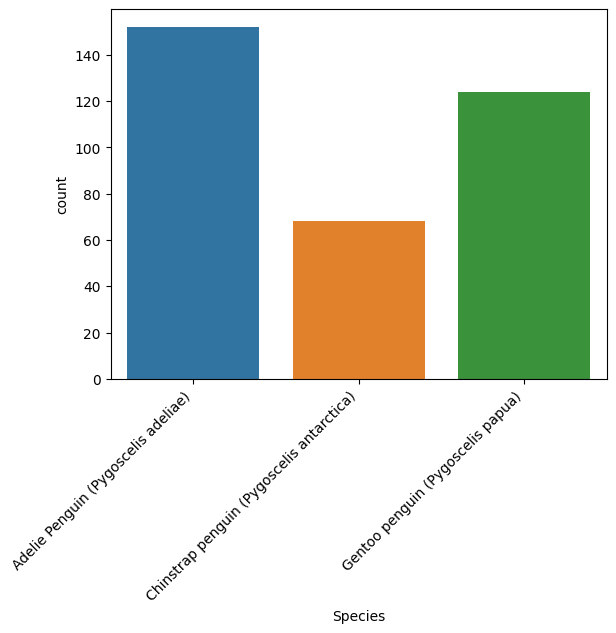

In [211]:
sns.countplot(data = df, x = 'Species',hue = 'Species')
plt.xticks(rotation = 45, ha = 'right')

# **Missing Data**

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Island               344 non-null    object 
 2   Culmen Length (mm)   342 non-null    float64
 3   Culmen Depth (mm)    342 non-null    float64
 4   Flipper Length (mm)  342 non-null    float64
 5   Body Mass (g)        342 non-null    float64
 6   Sex                  334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [213]:
df.isnull().sum()

Species                 0
Island                  0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Sex                    10
dtype: int64

we are simply dropping rows which have missing value, we end up with 334 entries out of original 344. 10 rows are gone.

In [214]:
df.dropna()
df.head()

Species     Island  Culmen Length (mm)  \
0  Adelie Penguin (Pygoscelis adeliae)  Torgersen                39.1   
1  Adelie Penguin (Pygoscelis adeliae)  Torgersen                39.5   
2  Adelie Penguin (Pygoscelis adeliae)  Torgersen                40.3   
3  Adelie Penguin (Pygoscelis adeliae)  Torgersen                 NaN   
4  Adelie Penguin (Pygoscelis adeliae)  Torgersen                36.7   

   Culmen Depth (mm)  Flipper Length (mm)  Body Mass (g)     Sex  
0               18.7                181.0         3750.0    MALE  
1               17.4                186.0         3800.0  FEMALE  
2               18.0                195.0         3250.0  FEMALE  
3                NaN                  NaN            NaN     NaN  
4               19.3                193.0         3450.0  FEMALE

In [215]:
df.shape

(344, 7)

In [216]:
df.Island.value_counts()

Island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

In [217]:
df.Sex.value_counts()

Sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

We can see there is one row with sex value is "."

In [218]:
df[df['Sex'] == '.']

Species  Island  Culmen Length (mm)  \
336  Gentoo penguin (Pygoscelis papua)  Biscoe                44.5   

     Culmen Depth (mm)  Flipper Length (mm)  Body Mass (g) Sex  
336               15.7                217.0         4875.0   .

The above row has all the information, but only sex value has bad info.

We can either choose to

 * drop this row (OR)
 * compare the information from other rows with similar values of this row and fill up with most likely sex value.

**Comparing with FEMALE , MALE Group values**
 * when we compare the data we can check for mean, min, max values for each features against each group
 * and deduct which sex group this missing row can be.

In [219]:
df[df['Species']=='Gentoo penguin (Pygoscelis papua)'].groupby('Sex').describe().transpose()

Sex                             .       FEMALE         MALE
Culmen Length (mm)  count     1.0    58.000000    61.000000
                    mean     44.5    45.563793    49.473770
                    std       NaN     2.051247     2.720594
                    min      44.5    40.900000    44.400000
                    25%      44.5    43.850000    48.100000
                    50%      44.5    45.500000    49.500000
                    75%      44.5    46.875000    50.500000
                    max      44.5    50.500000    59.600000
Culmen Depth (mm)   count     1.0    58.000000    61.000000
                    mean     15.7    14.237931    15.718033
                    std       NaN     0.540249     0.741060
                    min      15.7    13.100000    14.100000
                    25%      15.7    13.800000    15.200000
                    50%      15.7    14.250000    15.700000
                    75%      15.7    14.600000    16.100000
                    max      15.7    15.500000    17.300000
Flipper Length (mm) count     1.0    58.000000    61.000000
                    mean    217.0   212.706897   221.540984
                    std       NaN     3.897856     5.673252
                    min     217.0   203.000000   208.000000
                    25%     217.0   210.000000   218.000000
                    50%     217.0   212.000000   221.000000
                    75%     217.0   215.000000   225.000000
                    max     217.0   222.000000   231.000000
Body Mass (g)       count     1.0    58.000000    61.000000
                    mean   4875.0  4679.741379  5484.836066
                    std       NaN   281.578294   313.158596
                    min    4875.0  3950.000000  4750.000000
                    25%    4875.0  4462.500000  5300.000000
                    50%    4875.0  4700.000000  5500.000000
                    75%    4875.0  4875.000000  5700.000000
                    max    4875.0  5200.000000  6300.000000

#**Reassign the value of specific row using at**
After comparing the values against with each group, we decided to choose to set it as "FEMALE"

In [220]:
df.at[336,'Sex'] = 'Female'

In [221]:
df.loc[336]

Species                Gentoo penguin (Pygoscelis papua)
Island                                            Biscoe
Culmen Length (mm)                                  44.5
Culmen Depth (mm)                                   15.7
Flipper Length (mm)                                217.0
Body Mass (g)                                     4875.0
Sex                                               Female
Name: 336, dtype: object

# **Visualization**

In [222]:
columns_to_plot = ['Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)','Body Mass (g)']

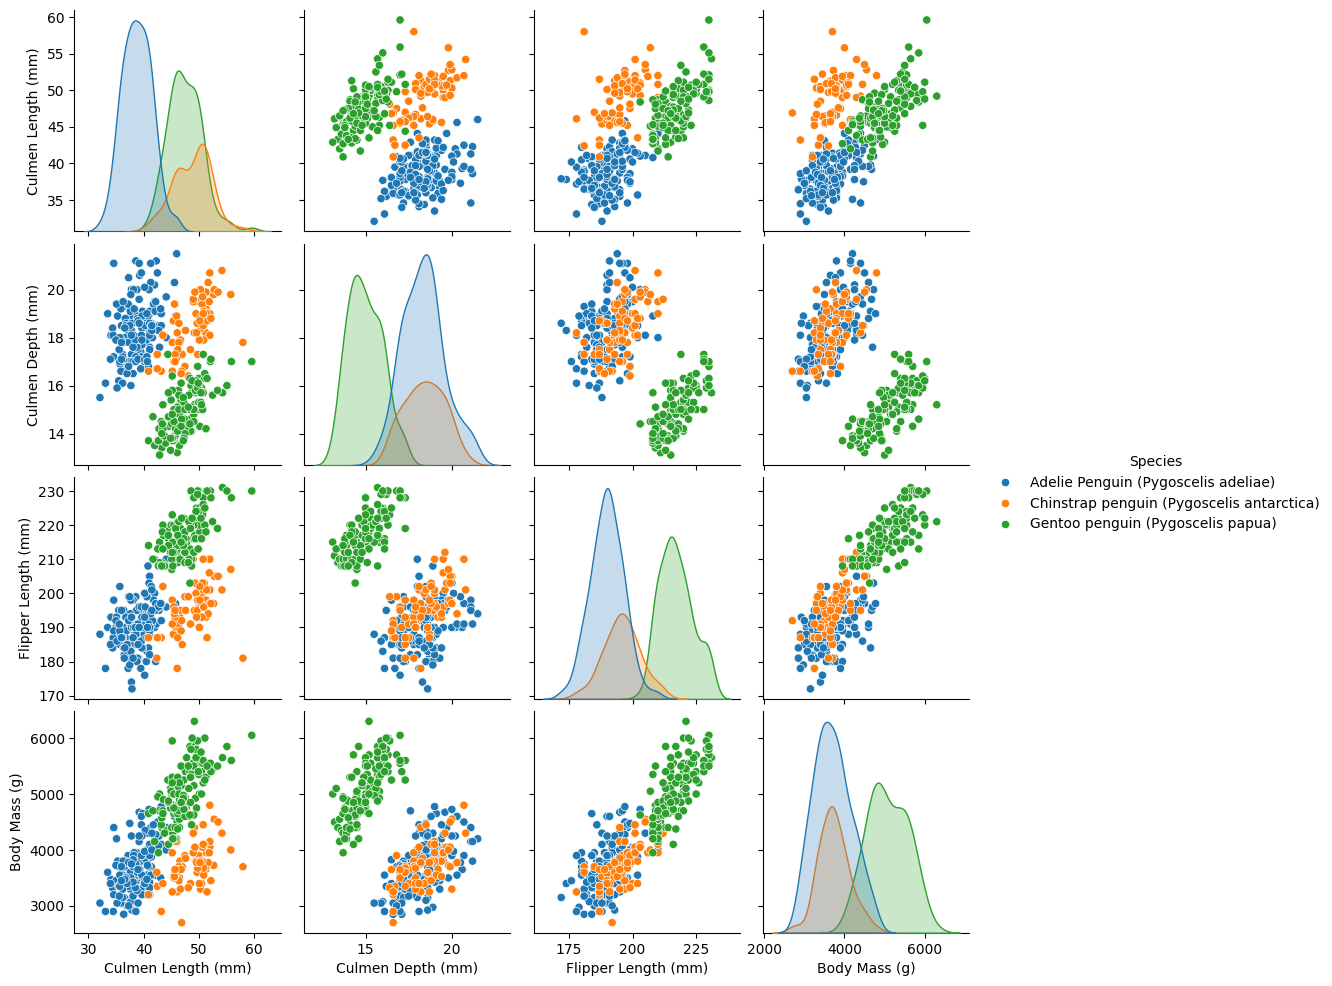

In [223]:
sns.pairplot(df,vars = df[columns_to_plot],hue='Species');

([0, 1, 2],
 [Text(0, 0, 'Adelie Penguin (Pygoscelis adeliae)'),
  Text(1, 0, 'Chinstrap penguin (Pygoscelis antarctica)'),
  Text(2, 0, 'Gentoo penguin (Pygoscelis papua)')])

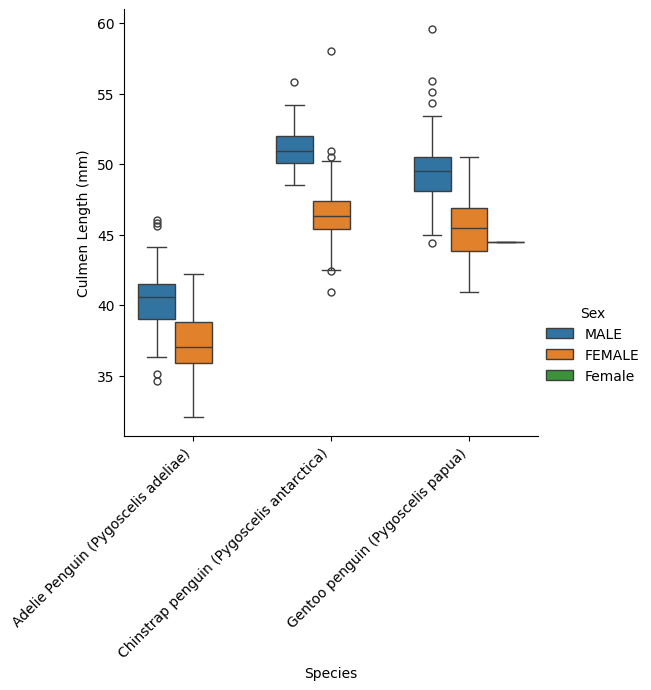

In [224]:
sns.catplot(data = df, x = 'Species',y='Culmen Length (mm)',kind='box',hue = 'Sex')
plt.xticks(rotation = 45, ha = 'right')

<Axes: xlabel='Culmen Length (mm)', ylabel='Culmen Depth (mm)'>

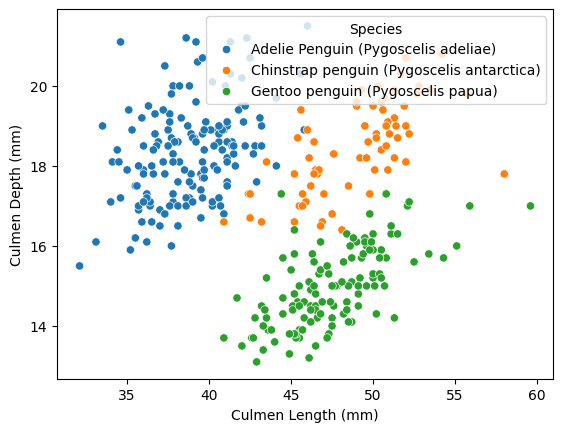

In [225]:
sns.scatterplot(data = df,x = 'Culmen Length (mm)',y = 'Culmen Depth (mm)',hue = 'Species')

In [226]:
from sklearn.preprocessing import LabelEncoder
df1 = df.copy()
for col in df1.columns:
  if df1[col].dtype == 'object':
    le = LabelEncoder()
    df1[col] = le.fit_transform(df1[col])

<Axes: >

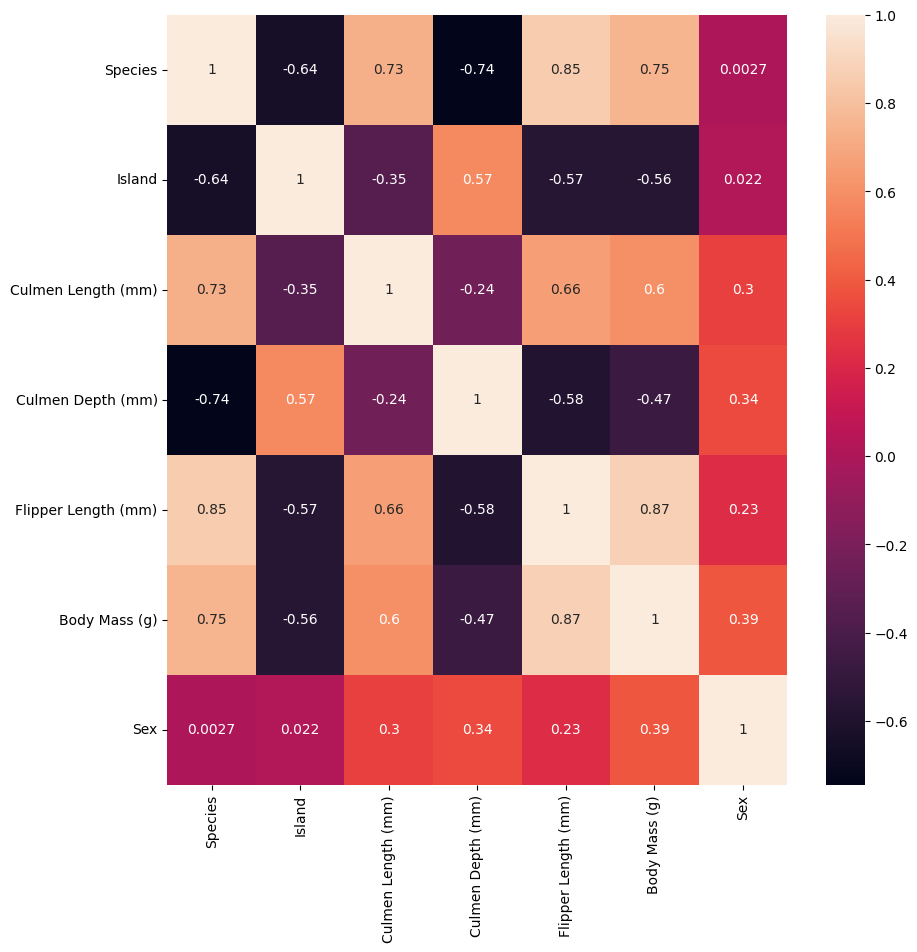

In [227]:
plt.figure(figsize = (10,10))
sns.heatmap(df1.corr(),annot = True)

# Checking for outliers

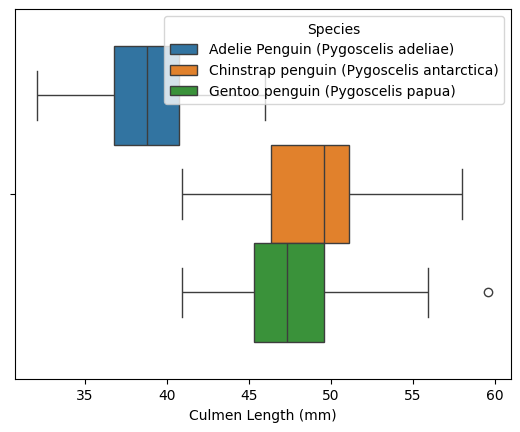

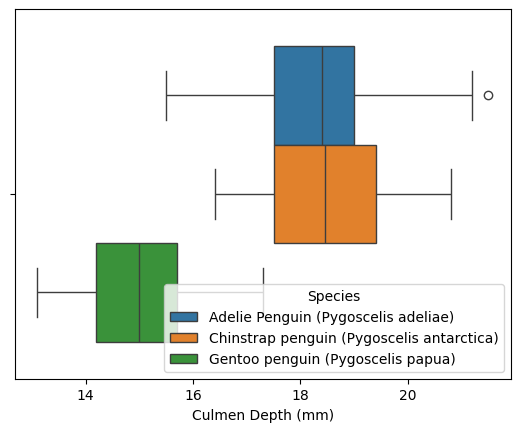

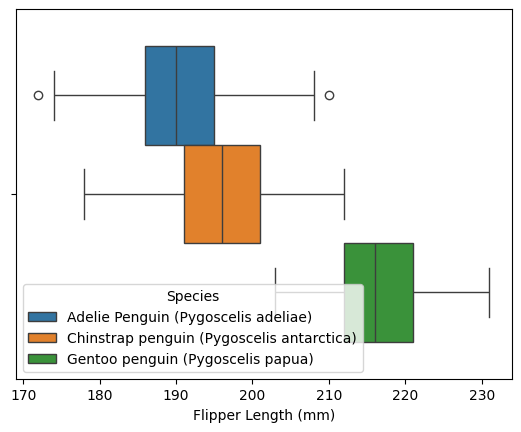

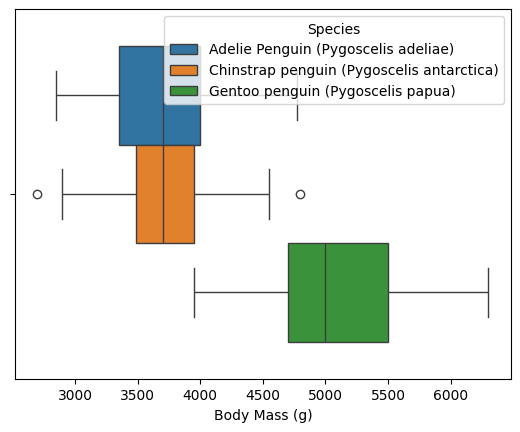

In [228]:


for col in df[columns_to_plot]:
  sns.boxplot(data = df,x = col,hue = 'Species')
  plt.show()

#**Feature Engineering**

 * As we have some of the features as categorical values (island, sex, etc.) we want to encode those values.
 * we can leave species label as string value.

In [229]:
df.columns

Index(['Species', 'Island', 'Culmen Length (mm)', 'Culmen Depth (mm)',
       'Flipper Length (mm)', 'Body Mass (g)', 'Sex'],
      dtype='object')

In [230]:
pd.get_dummies(df.drop('Species',axis = 1), drop_first = True,dtype = int)

Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
0                  39.1               18.7                181.0   
1                  39.5               17.4                186.0   
2                  40.3               18.0                195.0   
3                   NaN                NaN                  NaN   
4                  36.7               19.3                193.0   
..                  ...                ...                  ...   
339                 NaN                NaN                  NaN   
340                46.8               14.3                215.0   
341                50.4               15.7                222.0   
342                45.2               14.8                212.0   
343                49.9               16.1                213.0   

     Body Mass (g)  Island_Dream  Island_Torgersen  Sex_Female  Sex_MALE  
0           3750.0             0                 1           0         1  
1           3800.0             0                 1           0         0  
2           3250.0             0                 1           0         0  
3              NaN             0                 1           0         0  
4           3450.0             0                 1           0         0  
..             ...           ...               ...         ...       ...  
339            NaN             0                 0           0         0  
340         4850.0             0                 0           0         0  
341         5750.0             0                 0           0         1  
342         5200.0             0                 0           0         0  
343         5400.0             0                 0           0         1  

[344 rows x 8 columns]

# **Train | Test Split**

In [231]:
from sklearn.model_selection import train_test_split
x = pd.get_dummies(df.drop('Species',axis = 1),drop_first = True,dtype  = int)
y = df['Species']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

#**Decision Tree Classifier**
**Default Hyperparameters**

In [232]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [233]:
dtree_pred = pd.Series(dtree.predict(x_test))

In [234]:
result_dict = {'Actual':y_test,'Predicted':dtree_pred}
result_df = pd.DataFrame(result_dict)
result_df.sample(10,random_state = 42)

Actual  \
18                                         NaN   
42         Adelie Penguin (Pygoscelis adeliae)   
36                                         NaN   
90         Adelie Penguin (Pygoscelis adeliae)   
53                                         NaN   
167  Chinstrap penguin (Pygoscelis antarctica)   
56                                         NaN   
336          Gentoo penguin (Pygoscelis papua)   
173  Chinstrap penguin (Pygoscelis antarctica)   
4                                          NaN   

                               Predicted  
18     Gentoo penguin (Pygoscelis papua)  
42     Gentoo penguin (Pygoscelis papua)  
36     Gentoo penguin (Pygoscelis papua)  
90                                   NaN  
53   Adelie Penguin (Pygoscelis adeliae)  
167                                  NaN  
56   Adelie Penguin (Pygoscelis adeliae)  
336                                  NaN  
173                                  NaN  
4    Adelie Penguin (Pygoscelis adeliae)

#**Evaluation**

In [235]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [236]:
print(confusion_matrix(y_test,dtree_pred))

[[32  0  0]
 [ 0 16  0]
 [ 1  0 20]]


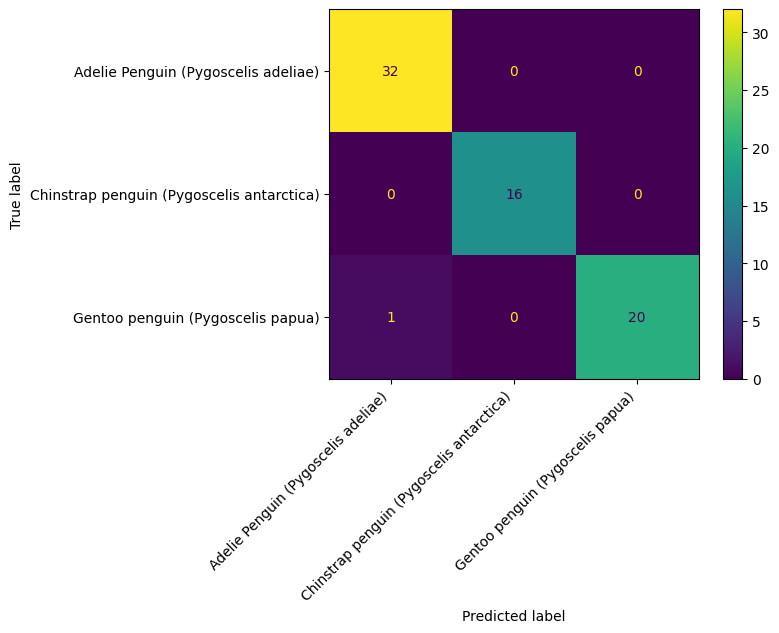

In [237]:
cm = confusion_matrix(y_test,dtree_pred)
display = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = dtree.classes_)
display.plot()
plt.xticks(rotation = 45, ha = 'right')
plt.show()


In [238]:
print(classification_report(y_test,dtree_pred))

                                           precision    recall  f1-score   support

      Adelie Penguin (Pygoscelis adeliae)       0.97      1.00      0.98        32
Chinstrap penguin (Pygoscelis antarctica)       1.00      1.00      1.00        16
        Gentoo penguin (Pygoscelis papua)       1.00      0.95      0.98        21

                                 accuracy                           0.99        69
                                macro avg       0.99      0.98      0.99        69
                             weighted avg       0.99      0.99      0.99        69



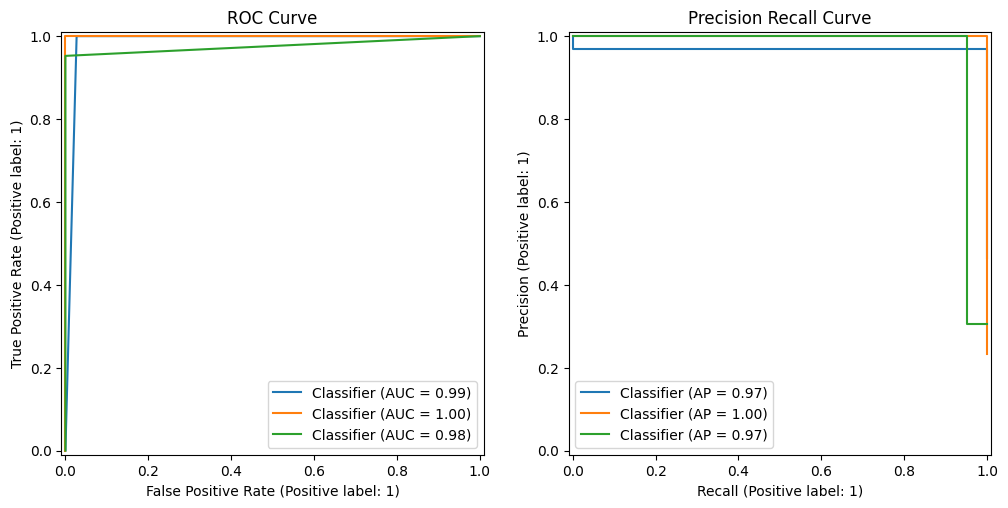

In [239]:
# ROC and Precision recall
from sklearn.metrics import RocCurveDisplay,PrecisionRecallDisplay

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,6))
for i , class_id in enumerate(dtree.classes_):
  y_test_binary = (y_test == class_id).astype(int)
  y_score_current_class = dtree.predict_proba(x_test)[:,i]
  RocCurveDisplay.from_predictions(y_test_binary,y_score_current_class,ax = ax1)
  ax1.set_title('ROC Curve')
  PrecisionRecallDisplay.from_predictions(y_test_binary,y_score_current_class,ax = ax2)
  ax2.set_title('Precision Recall Curve')


# **Feature importance**

In [240]:
pd.DataFrame(index = x.columns,data = dtree.feature_importances_,columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

Importance
Flipper Length (mm)    0.536472
Culmen Length (mm)     0.352857
Culmen Depth (mm)      0.061021
Island_Dream           0.022864
Sex_MALE               0.015306
Body Mass (g)          0.011479
Island_Torgersen       0.000000
Sex_Female             0.000000

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Species'),
  Text(1, 0, 'Island'),
  Text(2, 0, 'Culmen Length (mm)'),
  Text(3, 0, 'Culmen Depth (mm)'),
  Text(4, 0, 'Flipper Length (mm)'),
  Text(5, 0, 'Body Mass (g)'),
  Text(6, 0, 'Sex')])

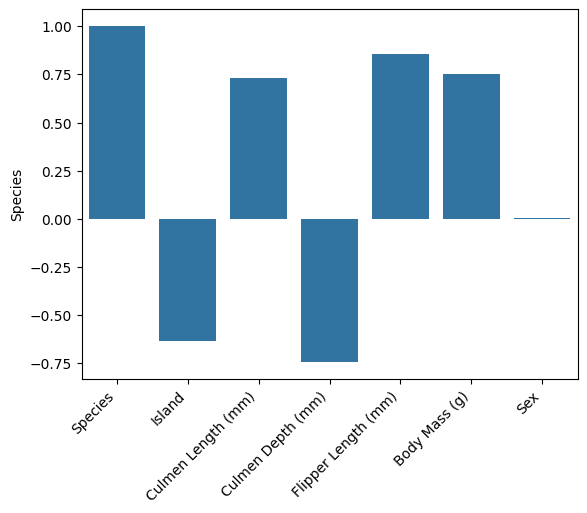

In [241]:
sns.barplot(df1.corr()['Species'])
plt.xticks(rotation = 45, ha = 'right')

We can see that flipper_length_mm has the most important feature as per the values.

So why features like **body_mass_g and island_Torgersen** are not being considered as important?

It is because of the hyperparmeters that model is using to contruct the tree. In our case none was given.

So often it is not even considering every features, unless we really push Decision Tree try to use every features. But we also need to take note that this may lead to overfitting.

To understand what is acutally happening insides the tree, we can visualize it.

[Text(0.65, 0.9166666666666666, 'x[2] <= 206.5\ngini = 0.634\nsamples = 275\nvalue = [120, 52, 103]'),
 Text(0.45, 0.75, 'x[0] <= 43.15\ngini = 0.415\nsamples = 166\nvalue = [118.0, 47.0, 1.0]'),
 Text(0.55, 0.8333333333333333, 'True  '),
 Text(0.25, 0.5833333333333334, 'x[0] <= 42.4\ngini = 0.05\nsamples = 117\nvalue = [114, 3, 0]'),
 Text(0.15, 0.4166666666666667, 'x[1] <= 16.65\ngini = 0.018\nsamples = 111\nvalue = [110, 1, 0]'),
 Text(0.1, 0.25, 'x[0] <= 39.3\ngini = 0.198\nsamples = 9\nvalue = [8, 1, 0]'),
 Text(0.05, 0.08333333333333333, 'gini = 0.0\nsamples = 8\nvalue = [8, 0, 0]'),
 Text(0.15, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.2, 0.25, 'gini = 0.0\nsamples = 102\nvalue = [102, 0, 0]'),
 Text(0.35, 0.4166666666666667, 'x[7] <= 0.5\ngini = 0.444\nsamples = 6\nvalue = [4, 2, 0]'),
 Text(0.3, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.4, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [4, 0, 0]'),
 Text(0.65, 0.5833333333333334, '

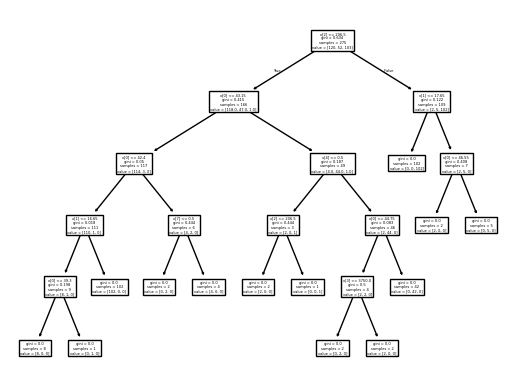

In [242]:
from sklearn.tree import plot_tree
plot_tree(dtree)

We can see the little figure at the bottom part.

[Text(0.65, 0.9166666666666666, 'Flipper Length (mm) <= 206.5\ngini = 0.634\nsamples = 275\nvalue = [120, 52, 103]\nclass = Adelie Penguin (Pygoscelis adeliae)'),
 Text(0.45, 0.75, 'Culmen Length (mm) <= 43.15\ngini = 0.415\nsamples = 166\nvalue = [118.0, 47.0, 1.0]\nclass = Adelie Penguin (Pygoscelis adeliae)'),
 Text(0.55, 0.8333333333333333, 'True  '),
 Text(0.25, 0.5833333333333334, 'Culmen Length (mm) <= 42.4\ngini = 0.05\nsamples = 117\nvalue = [114, 3, 0]\nclass = Adelie Penguin (Pygoscelis adeliae)'),
 Text(0.15, 0.4166666666666667, 'Culmen Depth (mm) <= 16.65\ngini = 0.018\nsamples = 111\nvalue = [110, 1, 0]\nclass = Adelie Penguin (Pygoscelis adeliae)'),
 Text(0.1, 0.25, 'Culmen Length (mm) <= 39.3\ngini = 0.198\nsamples = 9\nvalue = [8, 1, 0]\nclass = Adelie Penguin (Pygoscelis adeliae)'),
 Text(0.05, 0.08333333333333333, 'gini = 0.0\nsamples = 8\nvalue = [8, 0, 0]\nclass = Adelie Penguin (Pygoscelis adeliae)'),
 Text(0.15, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalu

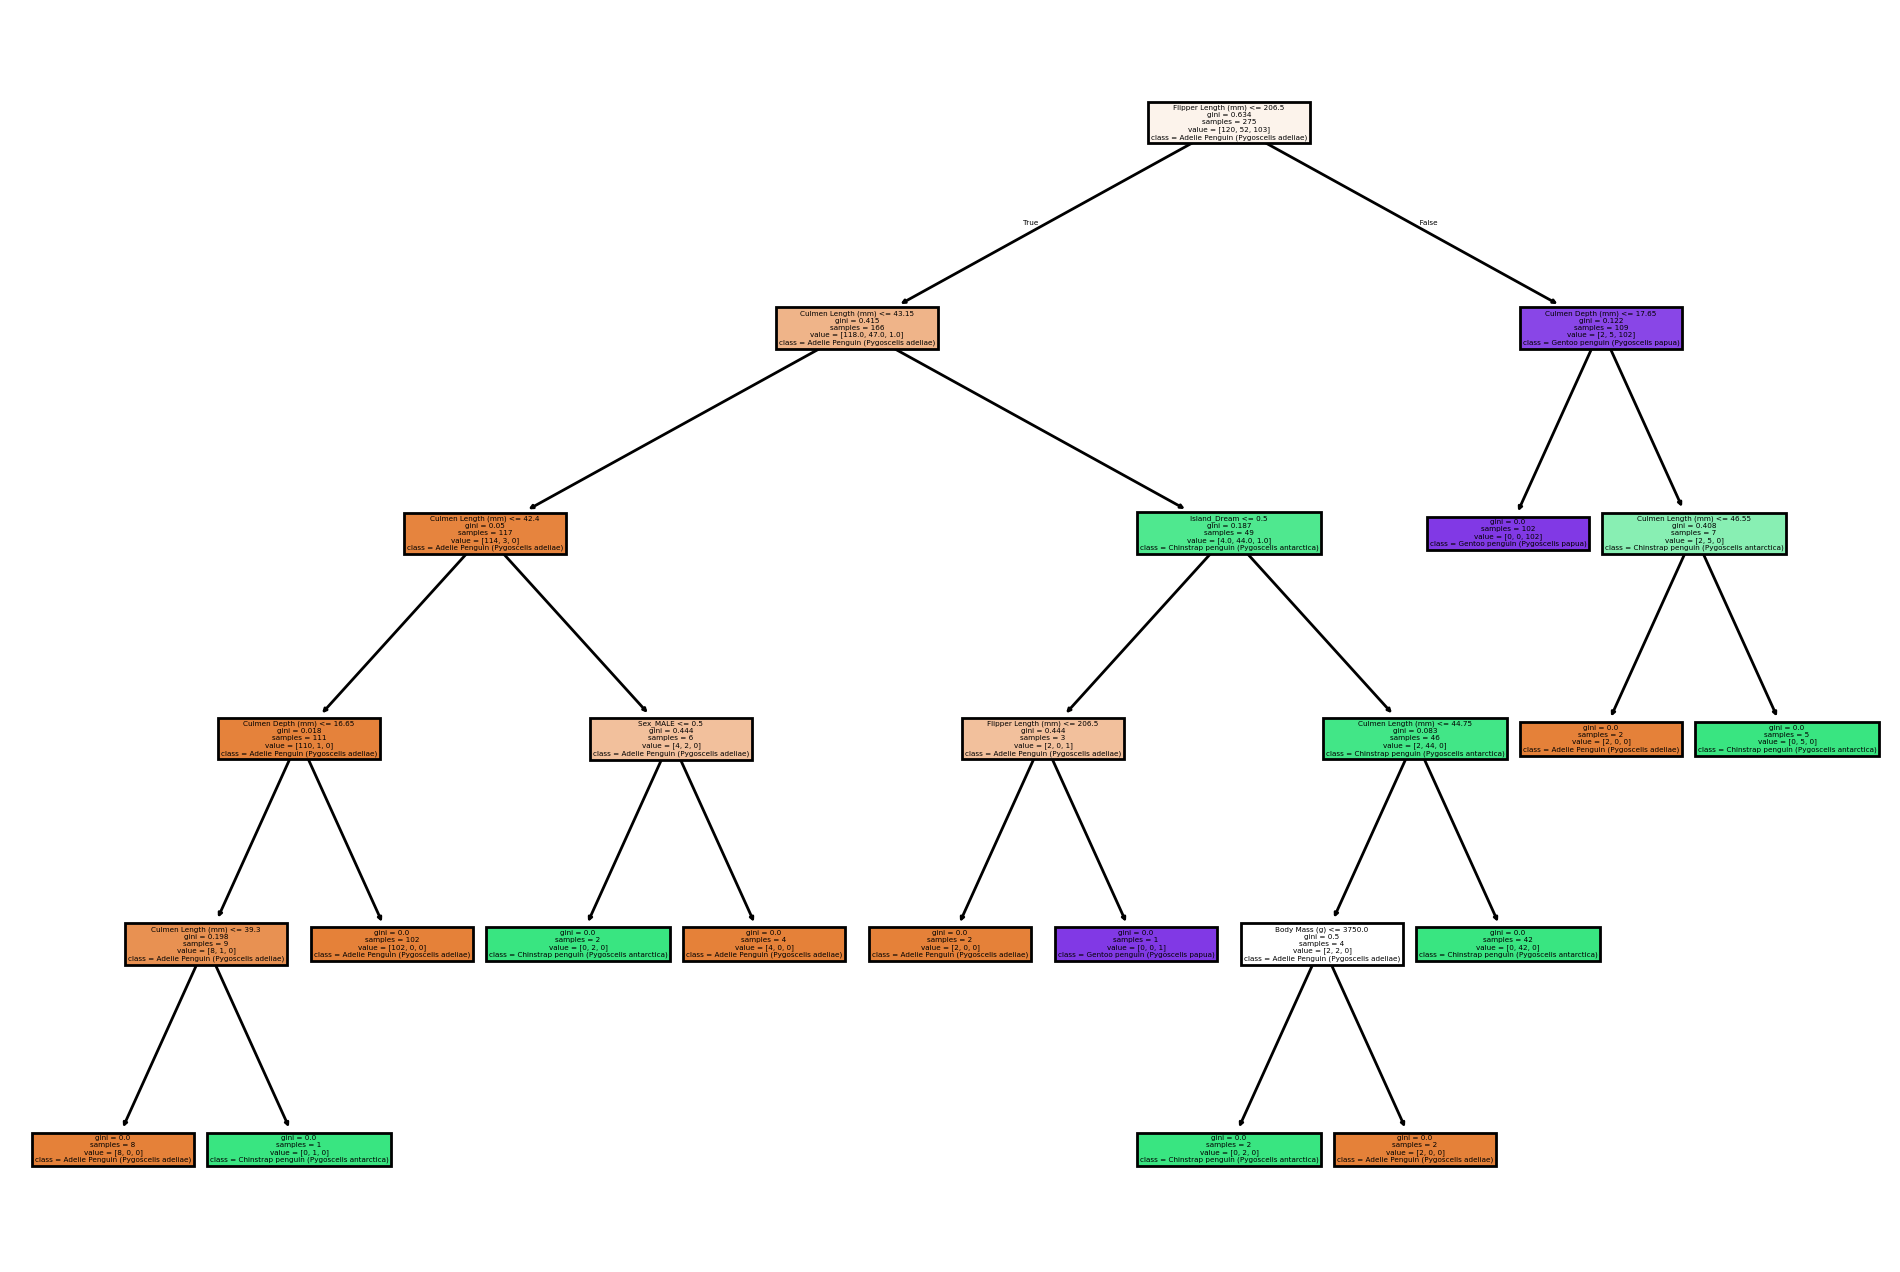

In [243]:
plt.figure(figsize=(12,8),dpi = 200)
plot_tree(dtree,feature_names = x.columns,class_names = dtree.classes_,filled = True)

we can see that X[2] is the base node, where index 2 of our dataset is flipper lenght mm.

That's why it got considered as the most important feature.

 * filled: to be more visually appealing
 * gini: gini impurity
 * samples: number of samples
 * value: label of each categories (in our case there are 3 penguin species)

# **Reporting Model Results**
To make it easier to report in the future, we will create a new function.

In [244]:
def report_model(model):
  model_pred = model.predict(x_test)

  print(classification_report(y_test,dtree_pred))
  print('\n')

  plt.figure(figsize= (12,8),dpi = 1000)
  plot_tree(dtree,feature_names = x.columns,class_names = dtree.classes_,filled = True)

In [245]:
report_model(dtree)

                                           precision    recall  f1-score   support

      Adelie Penguin (Pygoscelis adeliae)       0.97      1.00      0.98        32
Chinstrap penguin (Pygoscelis antarctica)       1.00      1.00      1.00        16
        Gentoo penguin (Pygoscelis papua)       1.00      0.95      0.98        21

                                 accuracy                           0.99        69
                                macro avg       0.99      0.98      0.99        69
                             weighted avg       0.99      0.99      0.99        69





# **Understanding Hyperparameters**

**Max Depth**

The base model has the max depth level of 5. So we will expirement reducing it.

In [246]:
pruned_tree = DecisionTreeClassifier(max_depth = 2)


In [247]:
pruned_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [248]:
report_model(pruned_tree)

                                           precision    recall  f1-score   support

      Adelie Penguin (Pygoscelis adeliae)       0.97      1.00      0.98        32
Chinstrap penguin (Pygoscelis antarctica)       1.00      1.00      1.00        16
        Gentoo penguin (Pygoscelis papua)       1.00      0.95      0.98        21

                                 accuracy                           0.99        69
                                macro avg       0.99      0.98      0.99        69
                             weighted avg       0.99      0.99      0.99        69





**Max Leaf Nodes**

In [249]:
max_leaf_tree = DecisionTreeClassifier(max_leaf_nodes = 3)
max_leaf_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

In [250]:
report_model(max_leaf_tree)

                                           precision    recall  f1-score   support

      Adelie Penguin (Pygoscelis adeliae)       0.97      1.00      0.98        32
Chinstrap penguin (Pygoscelis antarctica)       1.00      1.00      1.00        16
        Gentoo penguin (Pygoscelis papua)       1.00      0.95      0.98        21

                                 accuracy                           0.99        69
                                macro avg       0.99      0.98      0.99        69
                             weighted avg       0.99      0.99      0.99        69





**Criterion**

 * default: gini impurity

In [251]:
entropy_tree = DecisionTreeClassifier(criterion = 'entropy')
entropy_tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [252]:
report_model(entropy_tree)

                                           precision    recall  f1-score   support

      Adelie Penguin (Pygoscelis adeliae)       0.97      1.00      0.98        32
Chinstrap penguin (Pygoscelis antarctica)       1.00      1.00      1.00        16
        Gentoo penguin (Pygoscelis papua)       1.00      0.95      0.98        21

                                 accuracy                           0.99        69
                                macro avg       0.99      0.98      0.99        69
                             weighted avg       0.99      0.99      0.99        69



